In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
r=int(input('r:'))
d=int(input('d:'))
df=pd.DataFrame({i:100*np.random.random(1000) for i in range(d)})

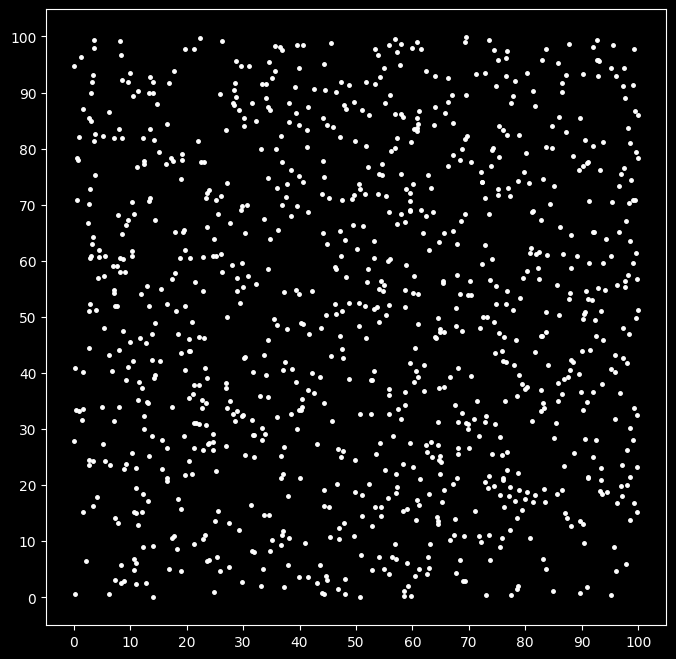

In [92]:
#graph,works only for d=2
plt.style.use('dark_background')
plt.figure(figsize=(8,8))
plt.xticks(np.arange(0,110,10))
plt.yticks(np.arange(0,110,10))
plt.plot(df[0],df[1],'w.',markersize=5)
plt.show()

In [93]:
def dist(df_,d,a,b):
    s=0
    for i in range(d):
        s=s+(df_.loc[a,i]-df_.loc[b,i])**2
    return s**(0.5)

In [94]:
pairs=set([])
for i in range(1000):
    grid=np.array([df.loc[i][j]//r for j in range(d)])
    # df_ = df.loc[all((df[k] >= grid[k] - 1) & (df[k] <= grid[k] + 2) for k in range(d))]
    # df_ = df.loc[np.all((df[k] >= grid[k] - 1) & (df[k] <= grid[k] + 2) for k in range(d))]
    # df_ = df.loc[(df.apply(lambda x: (x.between(grid[x.name] - 1, grid[x.name] + 2)), axis=0)).all(axis=1)]
    conditions = [(df[k] >= grid[k] - 1) & (df[k] <= grid[k] + 2) for k in range(d)]
    condition_all = np.all(np.column_stack(conditions), axis=1)
    df_ = df.loc[condition_all]
    for k in df_.index:
        if(i!=k):
            l=dist(df,d,i,k)
            if (k,i) in pairs:
                continue
            else:
                pairs.add((i,k))

In [95]:
pt_pairs=set([])
for (i,j) in pairs:
    a=tuple(df.iloc[i,:])
    b=tuple(df.iloc[j,:])
    pt_pairs.add((a,b))

In [96]:
for key in pt_pairs:
    print(key)

((91.0557319276258, 21.21276431436452, 9.946966665324798), (46.9293346237978, 10.3450778260891, 5.854047958272879))
((46.25648887525371, 58.90680409816761, 19.94242764291497), (24.629729245239616, 29.062010933513715, 10.119868486629214))
((23.90776896449197, 6.648841131480198, 12.323215929183407), (10.75488560178519, 4.8097643602987405, 6.382272835403324))
((8.104018199150687, 33.92675987580963, 34.546604963414055), (4.144275165828093, 17.81956766501921, 17.764073232608034))
((74.77954481556525, 52.24735394095348, 26.297788416618307), (36.6740767263037, 25.19885867623478, 14.146309652745703))
((90.63303528340198, 50.801014211662434, 20.583715992722684), (46.88933728758279, 26.39143799762005, 10.420724253101987))
((32.25033678210048, 55.86785785086414, 46.2454864186885), (15.599511933083976, 28.075661696841948, 23.2461052240684))
((68.86056453362282, 79.965714343596, 35.4633641196322), (33.98273596287058, 39.5562383072664, 18.69329988548768))
((37.00536710317473, 40.58184849095983, 73.8